In [53]:
import pandas as pd # data processing and CSV file I/O
import matplotlib.pyplot as plt # plotting
import numpy as np # mathematical analysis
from scipy import stats # statistical assistance

df = pd.read_csv('/Users/kanshruti/Documents/Sandbox/health-data/cardio_training.csv', delimiter=';', )

nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns in the dataset.') 

df.head(3) # sample rows and columns 


There are 70000 rows and 13 columns in the dataset.


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [174]:
# Calculating BMI (weight/height^2)

def bmiCalculate(df):
    bmi = [] # declaring new bmi list to store bmi values
    for i in range(len(df)):
        w = df.loc[i, 'weight'] 
        h = df.loc[i, 'height'] / 100
        bmi_val = w / (h * h)
        bmi.append(bmi_val) # calculating bmi value for each row and appending it to bmi list

    df['bmi'] = bmi # creating new bmi column in dataframe storing values in bmi list
    
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    return df

In [118]:
# Removing outliers from specificied column using quantiles

def remove_outliers(df, col):
    df[col] = np.where(df[col] < df[col].quantile(0.10), df[col].quantile(0.10),df[col])
    df[col] = np.where(df[col] > df[col].quantile(0.90), df[col].quantile(0.90),df[col])
    
    return df

In [175]:
# Creating new dataframe of bmi values without outliers

df1 = bmiCalculate(df)

df1 = remove_outliers(df1, 'bmi')

df1 = df1.head(100)

Text(0, 0.5, 'Blood Pressure')

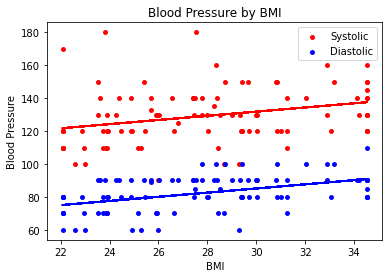

In [176]:
# Scatter plot of bmi and cholestrol 


fig, ax = plt.subplots()
a, b = np.polyfit(df1['bmi'], df1['ap_hi'], 1)
c, d = np.polyfit(df1['bmi'], df1['ap_lo'], 1)


ax.scatter(df1['bmi'], df1['ap_hi'], s=15, c="#FF0000", label="Systolic") # Scatter plot of points (BMI, Systolic)
ax.scatter(df1['bmi'], df1['ap_lo'], s=15, c="#0000FF", label="Diastolic") # Scatter plot of points (BMI, Diastolic)
leg = ax.legend()

plt.plot(df1['bmi'], a*df1['bmi']+b, c="#FF0000", label="Systolic") # Line of best fit (Systolic)
plt.plot(df1['bmi'], c*df1['bmi']+d, c="#0000FF", label="Diastolic") # Line of best fit (Diastolic)


ax.set_title('Blood Pressure by BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')

In [184]:
# Creates a correlation matrix of specified dataframe 

def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # removes columns without numbers
    df = df[[col for col in df if df[col].nunique() > 1]] # removes columns with redundant values
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='white', edgecolor='gray')
    corrMat = plt.matshow(corr, 1)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix of Cardio Training Dataset', fontsize=17)
    
    plt.show()

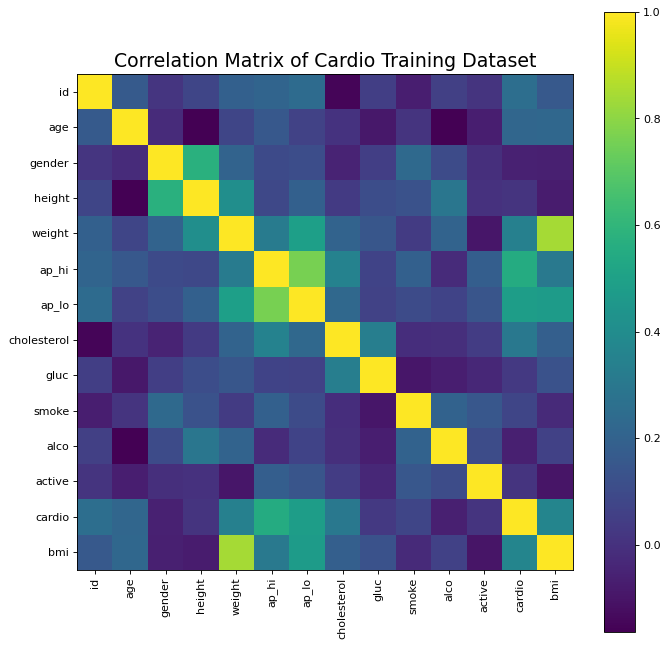

In [188]:
# Correlation matrix of cardio training dataset
df2 = bmiCalculate(df)

df2 = remove_outliers(df1, 'bmi')

plotCorrelationMatrix(df2, 10)

([<matplotlib.axis.XTick at 0x7f8bc84f6970>,
 [Text(0.5, 0, 'Low'),
  Text(1.5, 0, 'Medium'),
  Text(2.5, 0, 'High'),
  Text(3.5, 0, '')])

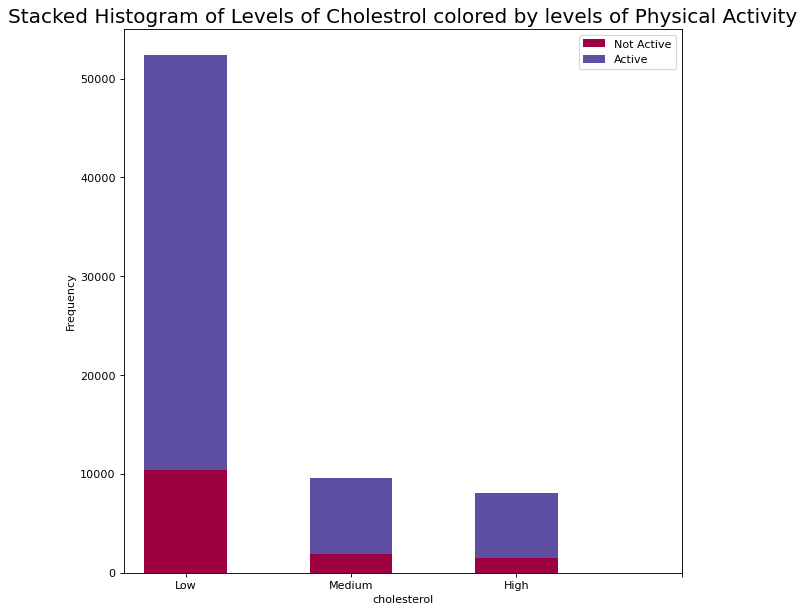

In [224]:
# Histogram of Levels of Cholestrol colored by levels of Physical Activity

x = 'cholesterol'
groupby_var = 'active'
df_agg = df.loc[:, [x, groupby_var]].groupby(groupby_var)
vals = [df[x].values.tolist() for i, df in df_agg]
active_labels = ["Not Active", "Active"]
chol_labels = ["Low", "Medium", "High", ""]

plt.figure(figsize=(9, 9), dpi= 80, facecolor='white', edgecolor='gray')
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, [0.5, 1.5, 2.5, 3.5], stacked=True, density=False, color=colors[:len(vals)], rwidth=0.5, align = 'left')

#df[x].unique().__len__()
plt.legend({group:col for group, col in zip(active_labels, colors[:len(vals)])})
plt.title(f"Stacked Histogram of Levels of Cholestrol colored by levels of Physical Activity", fontsize=18)
plt.xlabel(x)
plt.ylabel("Frequency")

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=chol_labels, horizontalalignment='center')

